In [9]:
kaggle_competition='titanic'

!kaggle competitions download -c {kaggle_competition} -p raw --quiet

In [13]:
!ls raw/train.csv 2>&1 > /dev/null ||\
  !unzip raw/titanic.zip -d raw

In [ ]:
!mkdir -p processed submissions

In [14]:
!ls raw

gender_submission.csv titanic.zip
test.csv              train.csv


In [15]:
%matplotlib inline
import pandas as pd

In [18]:
raw_files = 'raw'

In [19]:
pd.read_csv(f'{raw_files}/gender_submission.csv').head(1)

,PassengerId,Survived
0,892,0


In [20]:
df_train = pd.read_csv(f'{raw_files}/train.csv')
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
df_test = pd.read_csv(f'{raw_files}/test.csv')
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [39]:
def compare_enum_distributions(field_name):
    trn_vals = df_train[field_name].value_counts()
    test_vals = df_test[field_name].value_counts()
    trn_rel =  trn_vals  / float(len(df_train[field_name]))
    test_rel = test_vals / float(len( df_test[field_name]))
    trn_rel = trn_rel.round(2)
    test_rel = test_rel.round(2)
    return pd.DataFrame({'trn_rel': trn_rel,
                         'test_rel': test_rel})

compare_enum_distributions('Sex')

,trn_rel,test_rel
male,0.65,0.64
female,0.35,0.36


In [40]:
compare_enum_distributions('SibSp')

,trn_rel,test_rel
0,0.68,0.68
1,0.23,0.26
2,0.03,0.03
4,0.02,0.01
3,0.02,0.01
8,0.01,0.00
5,0.01,0.00


In [41]:
compare_enum_distributions('Parch')

,trn_rel,test_rel
0,0.76,0.78
1,0.13,0.12
2,0.09,0.08
3,0.01,0.01
4,0.00,0.00
5,0.01,0.00
6,0.00,0.00
9,NaN,0.00


In [42]:
compare_enum_distributions('Embarked')

,trn_rel,test_rel
S,0.72,0.65
C,0.19,0.24
Q,0.09,0.11


In [43]:
compare_enum_distributions('Pclass')

,trn_rel,test_rel
3,0.55,0.52
1,0.24,0.26
2,0.21,0.22


In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

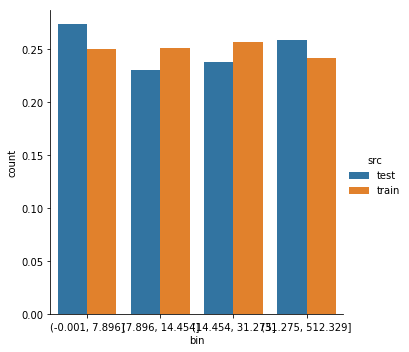

In [140]:
def compare_float_distributions(field_name, quantile_count=None):
    DEFAULT_QUANTILE_COUNT = 4
    df_train_fare = df_train[[field_name]].copy()
    df_train_fare['src'] = 'train'
    df_test_fare = df_test[[field_name]].copy()
    df_test_fare['src'] = 'test'
    df = pd.concat([df_train_fare, df_test_fare])
    df['bin'] = pd.qcut(df[field_name], q=quantile_count if quantile_count else DEFAULT_QUANTILE_COUNT)
    df_agg = df.pivot_table(columns=['src', 'bin'], aggfunc=['count']).droplevel(0)
    df_agg.reset_index(inplace=True)
    df_agg['count'] = df_agg.groupby('src')['count'].apply(lambda x: x / float(x.sum()))
    sns.catplot(x='bin', y='count', hue='src', data=df_agg, kind='bar')

compare_float_distributions('Fare')

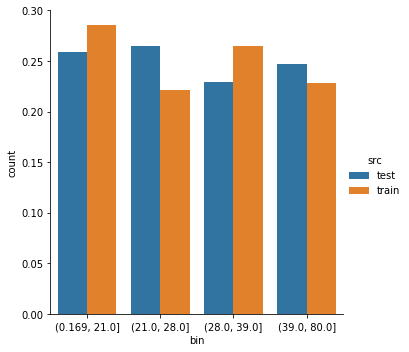

In [145]:
compare_float_distributions('Age')

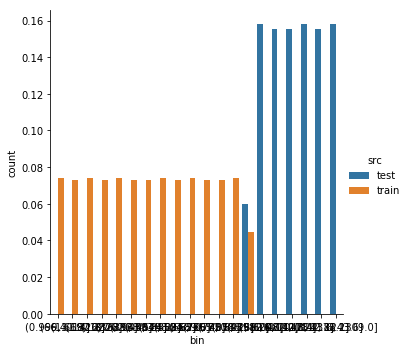

In [148]:
compare_float_distributions('PassengerId', 20)